In [1]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
src = "../00_data/penguins_lter.csv"

use = ['Sample Number', 'Species','Culmen Length (mm)', 'Culmen Depth (mm)', 'Flipper Length (mm)', 'Body Mass (g)', 'Sex']
header = ['sample_number', 'species','culmen_length_mm', 'culmen_depth_mm', 'flipper_length_mm', 'body_mass_g', 'sex']

species = {'Adelie Penguin (Pygoscelis adeliae)': 'Adelie',
       'Chinstrap penguin (Pygoscelis antarctica)': 'Chinstrap',
       'Gentoo penguin (Pygoscelis papua)': 'Gentoo'}

df_raw = pd.read_csv(src, usecols=use)
df_shrink = df_raw.set_axis(header, axis='columns')
df = df_shrink.replace(species)
print(df.shape)
df.head()

(344, 7)


sample_number species  culmen_length_mm  culmen_depth_mm  \
0              1  Adelie              39.1             18.7   
1              2  Adelie              39.5             17.4   
2              3  Adelie              40.3             18.0   
3              4  Adelie               NaN              NaN   
4              5  Adelie              36.7             19.3   

   flipper_length_mm  body_mass_g     sex  
0              181.0       3750.0    MALE  
1              186.0       3800.0  FEMALE  
2              195.0       3250.0  FEMALE  
3                NaN          NaN     NaN  
4              193.0       3450.0  FEMALE

In [3]:
pd.options.display.precision=4
df.describe()

sample_number  culmen_length_mm  culmen_depth_mm  flipper_length_mm  \
count       344.0000          342.0000         342.0000           342.0000   
mean         63.1512           43.9219          17.1512           200.9152   
std          40.4302            5.4596           1.9748            14.0617   
min           1.0000           32.1000          13.1000           172.0000   
25%          29.0000           39.2250          15.6000           190.0000   
50%          58.0000           44.4500          17.3000           197.0000   
75%          95.2500           48.5000          18.7000           213.0000   
max         152.0000           59.6000          21.5000           231.0000   

       body_mass_g  
count     342.0000  
mean     4201.7544  
std       801.9545  
min      2700.0000  
25%      3550.0000  
50%      4050.0000  
75%      4750.0000  
max      6300.0000

In [4]:
df[['species','culmen_length_mm','culmen_depth_mm']]\
    .groupby('species')\
    .describe().T

species                   Adelie  Chinstrap    Gentoo
culmen_length_mm count  151.0000    68.0000  123.0000
                 mean    38.7914    48.8338   47.5049
                 std      2.6634     3.3393    3.0819
                 min     32.1000    40.9000   40.9000
                 25%     36.7500    46.3500   45.3000
                 50%     38.8000    49.5500   47.3000
                 75%     40.7500    51.0750   49.5500
                 max     46.0000    58.0000   59.6000
culmen_depth_mm  count  151.0000    68.0000  123.0000
                 mean    18.3464    18.4206   14.9821
                 std      1.2166     1.1354    0.9812
                 min     15.5000    16.4000   13.1000
                 25%     17.5000    17.5000   14.2000
                 50%     18.4000    18.4500   15.0000
                 75%     19.0000    19.4000   15.7000
                 max     21.5000    20.8000   17.3000

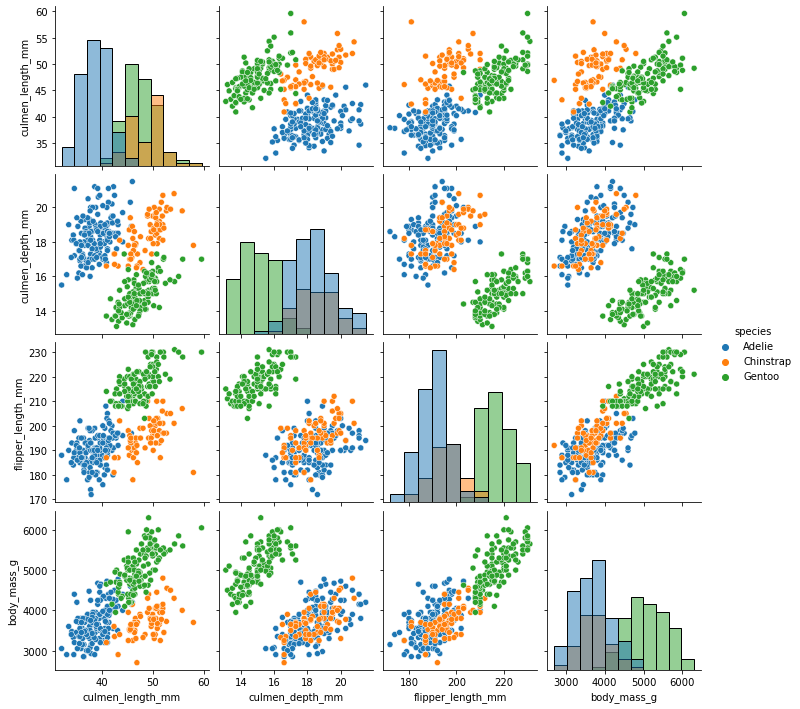

In [5]:
sns.pairplot(df.iloc[:,1:],hue="species",diag_kind="hist")

<AxesSubplot:xlabel='species', ylabel='flipper_length_mm'>

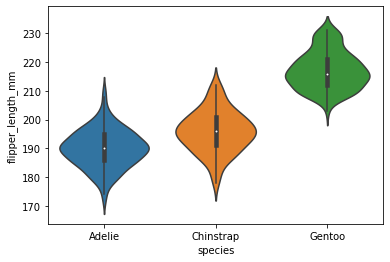

In [6]:
sns.violinplot(x="species", y="flipper_length_mm", data=df,size=8)

<AxesSubplot:xlabel='species', ylabel='body_mass_g'>

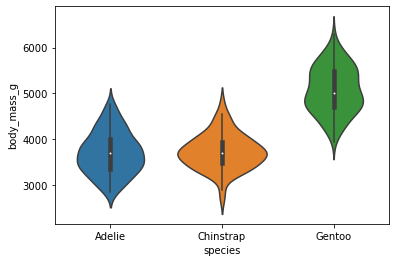

In [7]:
sns.violinplot(x="species", y="body_mass_g", data=df,size=8)

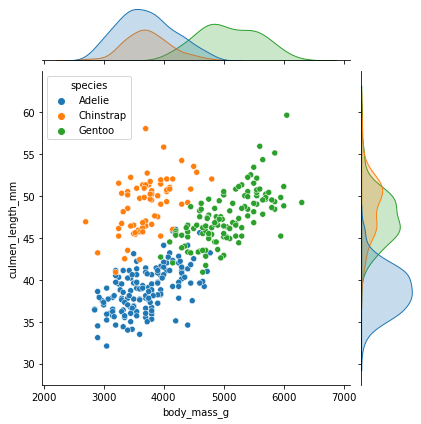

In [8]:
sns.jointplot(data=df, x="body_mass_g", y="culmen_length_mm", hue="species")

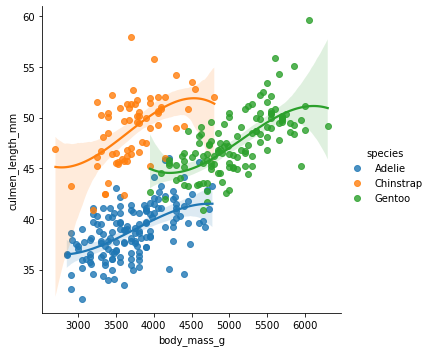

In [9]:
sns.lmplot(data=df, x="body_mass_g", y="culmen_length_mm", hue="species", ci=95, order=3)

In [10]:
from bokeh.plotting import figure, output_notebook, show
from bokeh.models import HoverTool
output_notebook()


Loading BokehJS ...

In [11]:
df.flipper_length_mm.to_numpy().shape

(344,)

In [12]:
species_list = ['Adelie', 'Chinstrap', 'Gentoo']
colors = ['blue','green','red']

flipper_length_groupby = []
hist_groupby = []
bin_edges_groupby = []
for s in species_list:
    flipper_length = df.query(f'species == "{s}"').flipper_length_mm.to_numpy()
    flipper_length_groupby.append(flipper_length)
    hist,bin_edges = np.histogram(flipper_length[~np.isnan(flipper_length)], bins=8)
    hist_groupby.append(hist)
    bin_edges_groupby.append(bin_edges)
#--

tooltips = [
    ('species', '$name')
]

p=figure(tools=[HoverTool()], tooltips=tooltips)
for i in range(3):
    p.quad(top=hist_groupby[i], bottom=0, left=bin_edges_groupby[i][:-1], right=bin_edges_groupby[i][1:],
           name=species_list[i], fill_color=colors[i], line_color='white', alpha=0.5)
show(p)


In [16]:
from ipywidgets import interact
from bokeh.io import push_notebook

species_list = ['Adelie', 'Chinstrap', 'Gentoo']
colors = ['blue','green','red']

def update_plot(species):
    df_selected = df.query(f'species == "{species}"')
    p=figure(x_axis_label='body_mass_g', y_axis_label='flipper_length_mm')
    p.circle(df_selected.body_mass_g, df_selected.flipper_length_mm)
    show(p, notebook_handle=True)
    push_notebook()
#--

interact(update_plot, species=species_list)

interactive(children=(Dropdown(description='species', options=('Adelie', 'Chinstrap', 'Gentoo'), value='Adelie…

<function __main__.update_plot(species)>